找出fits图像经纬范围

In [1]:
from astropy.wcs import WCS

wcs = WCS(r'D:\AI\docker_models\Ubuntu-Sextractor\config\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1_2.fits')
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 0.0 0.0 
CRPIX : 0.0 0.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.0 1.0 
NAXIS : 0  0


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


wcs关键字信息缺失不完整，读取fits图片头文件

In [1]:
from astropy.io import fits

header = fits.getheader(r'D:\AI\docker_models\Ubuntu-Sextractor\config\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1_2.fits')
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NEXTEND =                    1                                                  DATE    = '2021-05-25'         / Date this file was written                     TIME    = '12:00:00'           / Time this file was written                     FILENAME= 'CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1' / NaFILETYPE= 'sci     '           / type of data found in data data file           TELESCOP= 'CSST    '           / telescope used to acquire data                 INSTRUME= 'MSC     '           / identifier for instrument used to acquire data RADECSYS= 'ICRS    '           / frame of reference of coordinates              EQUINOX =               2000.0 / Default

缺少wcs关键词，补充关键词

In [4]:
from astropy.wcs import WCS
from astropy.io import fits

header = fits.getheader(r'D:\AI\docker_models\Ubuntu-Sextractor\config\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1_2.fits')
header['CTYPE1'] = 'RA---TAN'
header['CTYPE2'] = 'DEC--TAN'
header['CRVAL1'] = header['RA_OBJ'] 
header['CRVAL2'] = header['DEC_OBJ']  
header['CRPIX1'] = header['PIXSIZE1'] / 2 
header['CRPIX2'] = header['PIXSIZE2'] / 2  
header['CDELT1'] = -header['PIXSCAL1'] / 3600  
header['CDELT2'] = header['PIXSCAL2'] / 3600  
fits.writeto('your_image_fixed.fits', data=None, header=header, overwrite=True)

读取修复后wcs信息，并获取fits图像RA/DEC范围

In [5]:
from astropy.wcs import WCS

wcs = WCS(r'D:\AI\study1\your_image_fixed.fits')
print(wcs)
ra, dec = wcs.all_pix2world(x, y, 0)
print("RA range:", np.min(ra), np.max(ra))
print("Dec range:", np.min(dec), np.max(dec))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 271.0 -41.0 
CRPIX : 4608.0 4616.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -2.0555555555555e-05 2.05555555555555e-05 
NAXIS : 0  0
RA range: 271.1174631558663 271.12292534010754
Dec range: -41.09171515700021 -41.087609733168804


根据fits图像范围，下载该范围星表与fits图像作对比

X_IMAGE range: 18.0279 9215.6055
Y_IMAGE range: 1.3676 9231.5117
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 271.0 -41.0 
CRPIX : 4608.0 4616.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -2.0555555555555e-05 2.05555555555555e-05 
NAXIS : 0  0
SExtractor RA range: 270.87431290599704 271.12512295961363
SExtractor Dec range: -41.094829960656966 -40.90503978418613
星表Dec范围: -41.09482950047876 -40.90504339586157


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


匹配距离（角秒）: [4.55834719 1.82217651 2.10368499 ... 1.60565676 2.86319182 4.56569596]
匹配索引: [12400  3598 12748 ...  6147    10  2401]
匹配完成，结果已保存到 matched_sources.csv


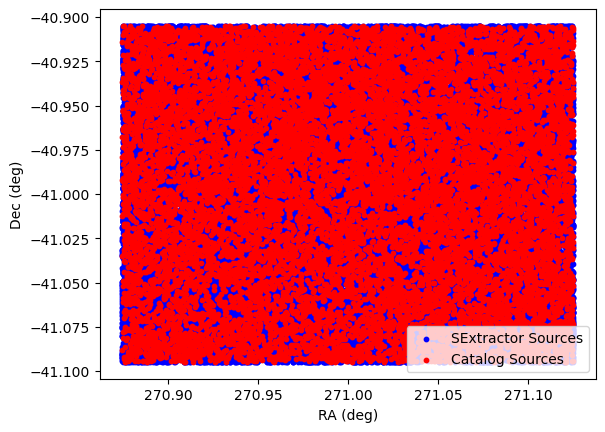

In [6]:
import pandas as pd
import numpy as np
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

column_names = ['X_IMAGE', 'Y_IMAGE']
sextractor_table = pd.read_csv(r'D:\AI\test.cat', sep='\s+', skiprows=2, header=None, names=column_names)
x = sextractor_table['X_IMAGE'].values
y = sextractor_table['Y_IMAGE'].values

print("X_IMAGE range:", np.min(x), np.max(x))
print("Y_IMAGE range:", np.min(y), np.max(y))

wcs = WCS(r'D:\AI\study1\your_image_fixed.fits')
print(wcs)

ra, dec = wcs.all_pix2world(x, y, 0)
ra = ra % 360  
dec = np.clip(dec, -90, 90)  
print("SExtractor RA range:", np.min(ra), np.max(ra))
print("SExtractor Dec range:", np.min(dec), np.max(dec))

catalog = pd.read_csv(r'D:\AI\study1\gaia_catalog2.csv')
catalog_ra = catalog['ra'].values
catalog_dec = catalog['dec'].values
print("星表Dec范围:", np.min(catalog_dec), np.max(catalog_dec))

sextractor_coords = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')
catalog_coords = SkyCoord(ra=catalog_ra * u.degree, dec=catalog_dec * u.degree, frame='icrs')

from astropy.coordinates import match_coordinates_sky
idx, sep2d, _ = match_coordinates_sky(sextractor_coords, catalog_coords)
match_radius = 5 * u.arcsec
matched = sep2d < match_radius
print("匹配距离（角秒）:", sep2d.arcsecond)
print("匹配索引:", idx)

labels = np.where(matched, 1, 0)
result_table = sextractor_table.copy()
result_table['Label'] = labels
result_table.to_csv('matched_sources.csv', index=False)
print("匹配完成，结果已保存到 matched_sources.csv")

plt.scatter(ra, dec, s=10, label='SExtractor Sources', color='blue')
plt.scatter(catalog_ra, catalog_dec, s=10, label='Catalog Sources', color='red')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

星表数据

星表列名: Index(['solution_id', 'DESIGNATION', 'SOURCE_ID', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper',
       'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper',
       'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper',
       'libname_gspphot'],
      dtype='object', length=152)
星表RA范围: 270.87432520397243 271.1251166157914
星表Dec范围: -41.09482950047876 -40.90504339586157


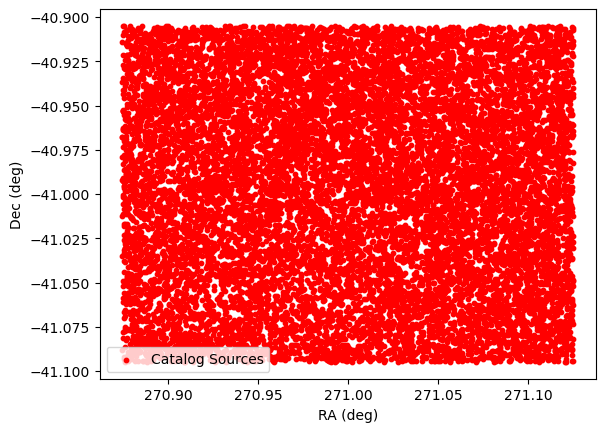

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

catalog = pd.read_csv('D:\AI\study1\gaia_catalog2.csv')
print("星表列名:", catalog.columns)

catalog_ra = catalog['ra'].values
catalog_dec = catalog['dec'].values
print("星表RA范围:", np.min(catalog_ra), np.max(catalog_ra))
print("星表Dec范围:", np.min(catalog_dec), np.max(catalog_dec))

plt.scatter(catalog_ra, catalog_dec, s=10, label='Catalog Sources', color='red')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

根据匹配文件对fits图像进行切割并打上标签构建数据集

In [20]:
from astropy.io import fits
import numpy as np

fits_image = fits.open(r'D:\AI\docker_models\Ubuntu-Sextractor\config\CSST_MSC_MS_SCI_20210525120000_20210525120230_100000000_08_L0_1_2.fits')
data = fits_image[1].data

catalog = np.loadtxt(r'D:\AI\study1\matched_sources.csv', delimiter=',', skiprows=1) 
x_positions = catalog[:, 0] 
y_positions = catalog[:, 1]  
labels = catalog[:, 2]  

def pad_patch(patch, patch_size):
    if patch.shape[0] < patch_size or patch.shape[1] < patch_size:
        pad_width = ((0, patch_size - patch.shape[0]), (0, patch_size - patch.shape[1]))
        patch = np.pad(patch, pad_width, mode='constant', constant_values=0)
    return patch

patch_size = 8 
patches = []
for x, y in zip(x_positions, y_positions):
    x = int(round(x))  
    y = int(round(y))
    patch = data[y - patch_size//2:y + patch_size//2,
                 x - patch_size//2:x + patch_size//2]
    patch = pad_patch(patch, patch_size)  
    patches.append(patch)

patches = np.array(patches)
print("提取到的图像块数量:", len(patches))
print("每个图像块的形状:", patches[0].shape)

提取到的图像块数量: 76081
每个图像块的形状: (8, 8)


对数据进行归一化，并且转换为适合CNN输入的格式

In [22]:
patches = patches / 255.0

from skimage.transform import resize
patches_resized = np.array([resize(patch, (patch_size, patch_size)) for patch in patches])

patches_resized = np.expand_dims(patches_resized, axis=-1)  

构建CNN模型

In [23]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 2 * 2) 
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

创建数据集和数据加载器

In [24]:
from torch.utils.data import DataLoader, TensorDataset

patches_tensor = torch.tensor(patches, dtype=torch.float32).unsqueeze(1)  
labels_tensor = torch.tensor(labels, dtype=torch.long)

dataset = TensorDataset(patches_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

初始化模型，定义损失函数和优化器

In [25]:
import torch.optim as optim

model = SimpleCNN(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [1/50], Loss: 0.3143
Epoch [2/50], Loss: 0.3115
Epoch [3/50], Loss: 0.3112
Epoch [4/50], Loss: 0.3109
Epoch [5/50], Loss: 0.3107
Epoch [6/50], Loss: 0.3106
Epoch [7/50], Loss: 0.3103
Epoch [8/50], Loss: 0.3101
Epoch [9/50], Loss: 0.3100
Epoch [10/50], Loss: 0.3100
Epoch [11/50], Loss: 0.3099
Epoch [12/50], Loss: 0.3095
Epoch [13/50], Loss: 0.3094
Epoch [14/50], Loss: 0.3092
Epoch [15/50], Loss: 0.3090
Epoch [16/50], Loss: 0.3087
Epoch [17/50], Loss: 0.3084
Epoch [18/50], Loss: 0.3080
Epoch [19/50], Loss: 0.3077
Epoch [20/50], Loss: 0.3074
Epoch [21/50], Loss: 0.3067
Epoch [22/50], Loss: 0.3059
Epoch [23/50], Loss: 0.3054
Epoch [24/50], Loss: 0.3044
Epoch [25/50], Loss: 0.3039
Epoch [26/50], Loss: 0.3030
Epoch [27/50], Loss: 0.3021
Epoch [28/50], Loss: 0.3015
Epoch [29/50], Loss: 0.3001
Epoch [30/50], Loss: 0.2996
Epoch [31/50], Loss: 0.2986
Epoch [32/50], Loss: 0.2975
Epoch [33/50], Loss: 0.2970
Epoch [34/50], Loss: 0.2959
Epoch [35/50], Loss: 0.2952
Epoch [36/50], Loss: 0.2944
E

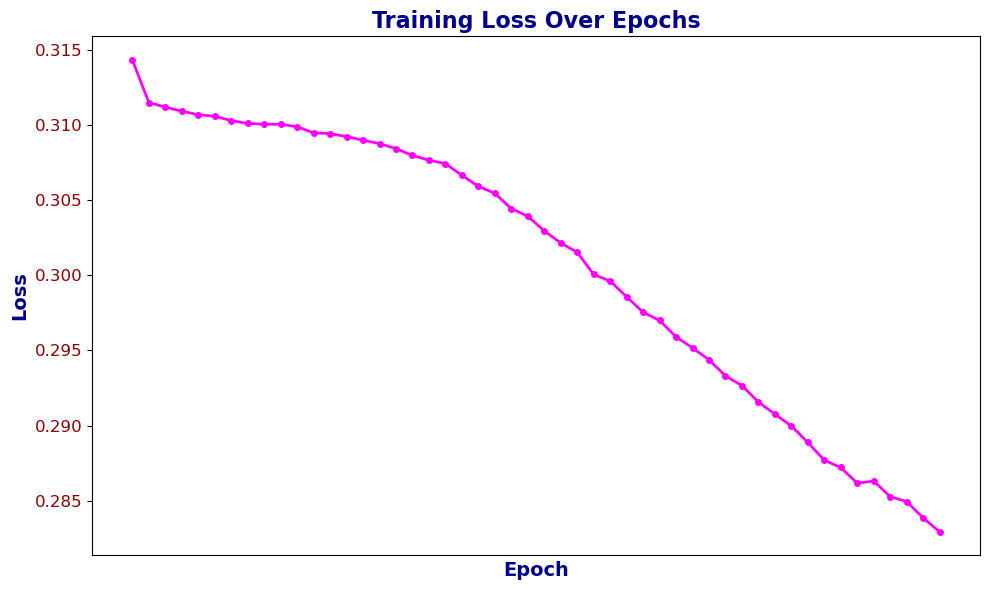

In [26]:
import matplotlib.pyplot as plt

num_epochs = 50
epoch_losses = []  
plt.figure(figsize=(10, 6))

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')

plt.plot(epoch_losses, marker='o', linestyle='-', color='magenta', linewidth=2, markersize=4) 
plt.title('Training Loss Over Epochs', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Epoch', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Loss', fontsize=14, fontweight='bold', color='darkblue')
plt.grid(False) 
plt.xticks([]) 
plt.yticks(fontsize=12, color='darkred')  
plt.tight_layout()  
plt.show()

测试模型准确率

In [27]:
model.eval() 
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 91.37%
